# Karate binary case

# Part 2 - best modularity score (Q) search

Experiment objectives
1. Search for highest possible modularity scores with gamma in optimal range found in part 1. Compare them with the referential max. value of **0.4036** discovered in part 1.
2. Measure the frequency of obtaining the hightest modularity score.


Glossary
- res. - resolution (abbr.)
- matrix resolution (gamma) - the input network hyperparameter determining the objective function of a given problem
- modularity resolution - modularity hyperparameter passed to the modularity score function
- modularity score (Q) - result of the modularity score function
- **referential modularity score (Q_max)** - louvain method output from part 1. Equal to 0.4036.

Constants
- For the purposes of this experiment and the following ones, we arbitrarily set the modularity resolution to 1.0. As it is constant, modularity scores can be compared against each other.

# Advantage

## Exp 1

#### Experiment scope:
- gamma in range [0.85, 1.6], 20 values
- for each value run 10 times

In [2]:
GAMMA_LOWER_BOUND = 0.85
GAMMA_UPPER_BOUND = 1.6

In [3]:
import pandas as pd
from paths import csv_path, KARATE_PR_NAME


# Id for data storage purposes
ID = 3

a = pd.read_csv(
    csv_path(id=ID, problem_name=KARATE_PR_NAME, solver_name="adv")
)

In [4]:
K = 2

n_all = a.shape[0]

n_groups = a.groupby(a.matrix_res).ngroups
n_in_group = a.groupby(a.matrix_res).matrix_res.value_counts().iloc[0]

print(
    f"Run for {n_groups} resolution param values"+f"for each value run {n_in_group} times."
)

Run for 20 resolution param valuesfor each value run 10 times.


#### Group results by matrix resolution (gamma) input

In [5]:
import numpy as np


# Only res. samples with 2 communities
print("All samples produced 2 communities: ", np.all(a == a[a["k"] == K]))

a_scores = a.mod_score
a_matrix_res = a.matrix_res

# Group by matrix resolution
# Measure mean and max values 
# for each matrix res. input
a_by_res = a.groupby(a.matrix_res, group_keys=True).agg(
    {"mod_score": ["mean", "std", "max", "min"]}
)

# Decimals precision
score_prec = 4
idx_prec = 2
a_by_res = a_by_res.round(score_prec)
a_by_res.index = a_by_res.index.to_series().round(idx_prec)

print(f"{a.shape[0]} results entries")
print(f"{a_by_res.shape[0]} resolution value params")

All samples produced 2 communities:  True
200 results entries
20 resolution value params


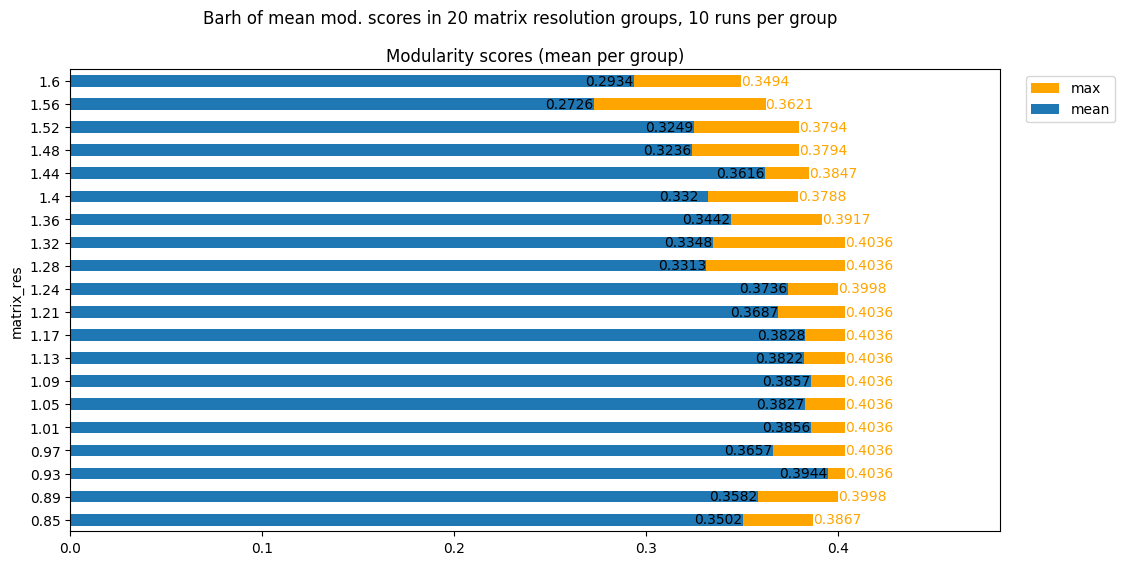

In [6]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle("Barh of mean mod. scores in "+f"{n_groups} matrix resolution groups, "+f"{n_in_group} runs per group")

a_max_barh = a_by_res.mod_score["max"].plot(ax=ax, kind="barh", color="orange")
ax.bar_label(ax.containers[-1], label_type="edge", color="orange")

a_mean_barh = a_by_res.mod_score["mean"].plot(ax=ax, kind="barh")
ax.bar_label(ax.containers[-1], label_type="edge", position=(-35,0), color="black")

ax.margins(x=0.2)
ax.set_title("Modularity scores (mean per group)")

ax.legend(
    bbox_to_anchor=(1.02, 1), loc=2
);

# Save for later
np.savez("plot", a_mean=a_by_res.mod_score["mean"], a_max=a_by_res.mod_score["max"], index= a_by_res.index)

In [7]:
a_by_res[a_by_res.index == 0.93]

mod_score                        
                mean     std     max     min
matrix_res                                  
0.93          0.3944  0.0076  0.4036  0.3859

- In Part 1 Advantage produced senisble results in range [1.04, 1.33] with mean mod. score >= 0.
- Now, in Part 2, Advantage produces referential results with mean mod.score >= 0.38 in range [0.93, 1.17]. 
- What this shows is that the results are very uneven and heuristic plays a big role. <font color="green">However, best results were mean mod. score 0.3944 for gamma 0.93 with low std 0.0076</font> -> consistent, good results for this particular gamma (let's keep that in mind).
- Almost for each gamma in range [0.93, 1.17] the referential louvain modularity score was achieved at least once.

In [8]:
a_by_res

mod_score                        
                mean     std     max     min
matrix_res                                  
0.85          0.3502  0.0225  0.3867  0.3093
0.89          0.3582  0.0325  0.3998  0.3005
0.93          0.3944  0.0076  0.4036  0.3859
0.97          0.3657  0.0405  0.4036  0.2777
1.01          0.3856  0.0180  0.4036  0.3477
1.05          0.3827  0.0197  0.4036  0.3477
1.09          0.3857  0.0181  0.4036  0.3527
1.13          0.3822  0.0182  0.4036  0.3477
1.17          0.3828  0.0156  0.4036  0.3607
1.21          0.3687  0.0364  0.4036  0.3005
1.24          0.3736  0.0179  0.3998  0.3477
1.28          0.3313  0.0538  0.4036  0.2392
1.32          0.3348  0.0504  0.4036  0.2421
1.36          0.3442  0.0299  0.3917  0.2873
1.40          0.3320  0.0414  0.3788  0.2597
1.44          0.3616  0.0253  0.3847  0.3093
1.48          0.3236  0.0437  0.3794  0.2712
1.52          0.3249  0.0383  0.3794  0.2509
1.56          0.2726  0.0492  0.3621  0.1976
1.60          0.2934  0.0539  0.3494  0.1903

index min: 0.85
index max: 1.6
mean mod. score min: 0.2726
mean mod. score max: 0.3944


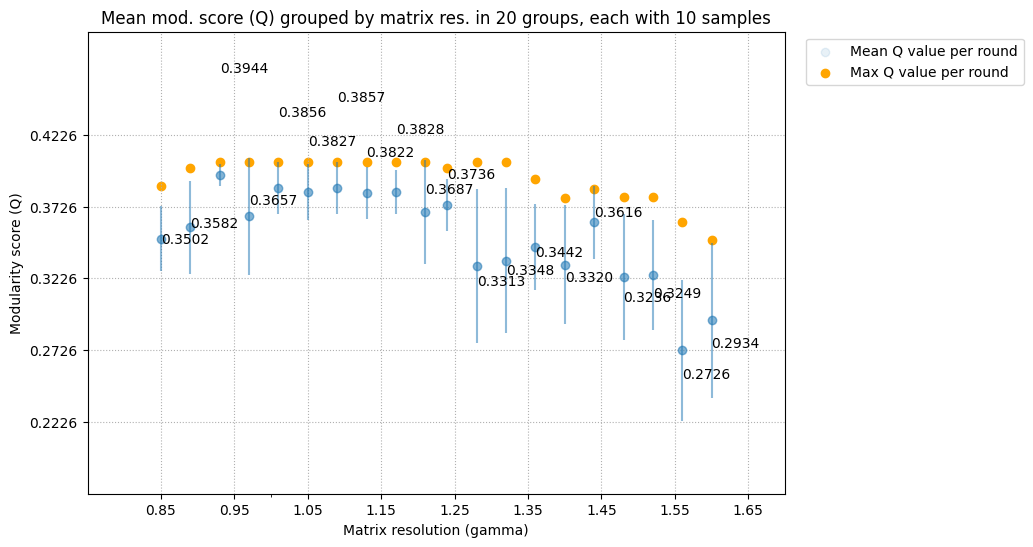

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


a_x_min = a_by_res.index.min()
a_x_max = a_by_res.index.max()
a_score_mean_min = a_by_res.mod_score["mean"].min()
a_score_mean_max = a_by_res.mod_score["mean"].max()

print(f"index min: {a_x_min}")
print(f"index max: {a_x_max}")
print(f"mean mod. score min: {a_score_mean_min}")
print(f"mean mod. score max: {a_score_mean_max}")


plt.rcParams["figure.figsize"] = (9, 6)

x_major_ticker = mpl.ticker.MultipleLocator(5)
x_minor_ticker = mpl.ticker.MultipleLocator(1)


fig, axes = plt.subplots()

axes.xaxis.set_major_locator(x_major_ticker)
axes.xaxis.set_minor_locator(x_minor_ticker)

axes.set_title(
    f"Mean mod. score (Q) grouped by matrix res. in {n_groups} groups,"
    + f" each with {n_in_group} samples"
)
axes.set_xlabel("Matrix resolution (gamma)")
axes.set_ylabel("Modularity score (Q)")

axes.grid(which="major", linestyle=":")

x_margin = 0.1
axes.set_xlim(a_x_min - x_margin, a_x_max + x_margin)
axes.set_xticks(np.arange(GAMMA_LOWER_BOUND, GAMMA_UPPER_BOUND + x_margin / 2, x_margin))
y_margin = 0.1
axes.set_ylim(a_score_mean_min - y_margin, a_score_mean_max + y_margin)
axes.set_yticks(
    np.arange(
        a_score_mean_min - y_margin / 2,
        a_score_mean_max + y_margin / 2,
        step=y_margin / 2,
    )
)

axes.scatter(
    a_by_res.mod_score.index,
    a_by_res.mod_score["mean"],
    label="Mean Q value per round",
    alpha=0.1,
)
axes.scatter(
    a_by_res.mod_score.index,
    a_by_res.mod_score["max"],
    c="orange",
    label="Max Q value per round",
)
axes.errorbar(
    a_by_res.mod_score.index,
    a_by_res.mod_score["mean"],
    yerr=a_by_res.mod_score["std"],
    fmt="o",
    alpha=0.5,
)

x_offsets = [
    0.0009 * (-1) ** (i + 1) if y > 0.425 else 0
    for i, (x, y) in enumerate(
        zip(a_by_res.index, a_by_res.mod_score["mean"])
    )
]

d = {k: v for k, v in enumerate(zip(a_by_res.index, a_by_res.mod_score["mean"]))}
d_sorted = dict(sorted(d.items(), key=lambda item: item[1][1]))
y_offsets = [0.1 if x > 0.41 else -0.03 for x in a_by_res.mod_score["mean"]]

off = 0.01
for i, t in enumerate(list(d_sorted.items())):
    _, (k, v) = t
    axes.annotate(text=f"{v:.4f}", xy=(k + x_offsets[i], v+y_offsets[i]+off), color="black")
    # off += 0.005
    off *= 1.13

axes.legend(bbox_to_anchor=(1.02, 1), loc=2);

#### We will not be comparing these results against louvain, as this gamma range is not suitable for louvain to produce 2 communities, louvain needs a different gamma range to meet the binary case in question.

## Exp 2 - results frequential importance
Increase no. of runs per gamma value -> from 10 to 30, to get a better grasp of frequencies.

#### Experiment scope:
- gamma in range [0.8, 1.6], 20 values
- for each value run 30 times

In [10]:
GAMMA_LOWER_BOUND = 0.8
GAMMA_UPPER_BOUND = 1.6

In [11]:
import pandas as pd
from paths import csv_path, KARATE_PR_NAME


# Id for data storage purposes
ID = 6

a = pd.read_csv(
    csv_path(id=ID, problem_name=KARATE_PR_NAME, solver_name="adv")
)

In [12]:
K = 2

n_all = a.shape[0]

n_groups = a.groupby(a.matrix_res).ngroups
n_in_group = a.groupby(a.matrix_res).matrix_res.value_counts().iloc[0]

print(
    f"Run for {n_groups} resolution param values "+f"for each value run {n_in_group} times."
)

Run for 20 resolution param values for each value run 30 times.


In [13]:
import numpy as np


# Only res. samples with 2 communities
print("All samples produced 2 communities: ", np.all(a == a[a["k"] == K]))

a_scores = a.mod_score
a_matrix_res = a.matrix_res

# Group by matrix resolution
# Measure mean and max values 
# for each matrix res. input
a_by_res = a.groupby(a.matrix_res, group_keys=True).agg(
    {"mod_score": ["mean", "std", "max", "min"]}
)

# Decimals precision
score_prec = 4
idx_prec = 2
a_by_res = a_by_res.round(score_prec)
a_by_res.index = a_by_res.index.to_series().round(idx_prec)

print(f"{a.shape[0]} results entries")
print(f"{a_by_res.shape[0]} resolution value params")

All samples produced 2 communities:  True
600 results entries
20 resolution value params


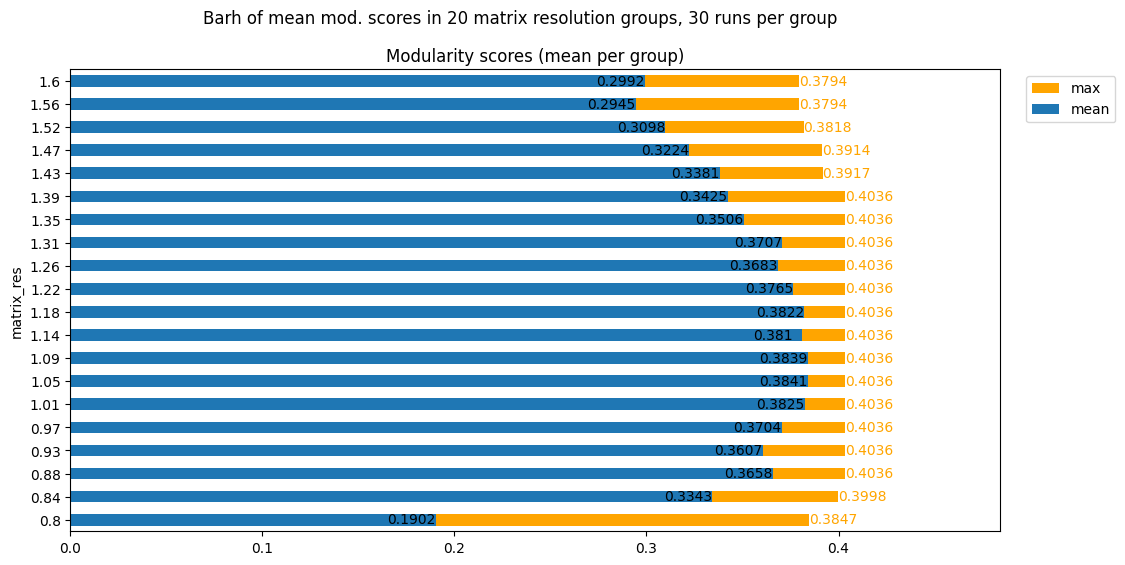

In [14]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle("Barh of mean mod. scores in "+f"{n_groups} matrix resolution groups, "+f"{n_in_group} runs per group")

a_max_barh = a_by_res.mod_score["max"].plot(ax=ax, kind="barh", color="orange")
ax.bar_label(ax.containers[-1], label_type="edge", color="orange")

a_mean_barh = a_by_res.mod_score["mean"].plot(ax=ax, kind="barh")
ax.bar_label(ax.containers[-1], label_type="edge", position=(-35,0), color="black")

ax.margins(x=0.2)
ax.set_title("Modularity scores (mean per group)")

ax.legend(
    bbox_to_anchor=(1.02, 1), loc=2
);

- Quite good news - Advantage output the referential maximum mod. score of 0.4036 at least once for all runs for gamma in range [0.88, 1.39] - the frequency examined further in the report.

index min: 0.8
index max: 1.6
mean mod. score min: 0.1902
mean mod. score max: 0.3841


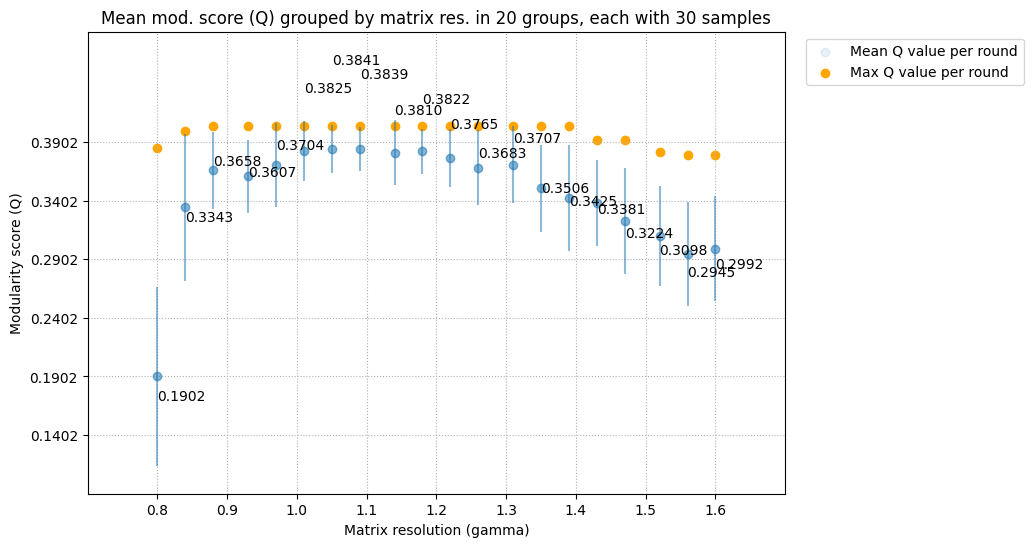

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


a_x_min = a_by_res.index.min()
a_x_max = a_by_res.index.max()
a_score_mean_min = a_by_res.mod_score["mean"].min()
a_score_mean_max = a_by_res.mod_score["mean"].max()

print(f"index min: {a_x_min}")
print(f"index max: {a_x_max}")
print(f"mean mod. score min: {a_score_mean_min}")
print(f"mean mod. score max: {a_score_mean_max}")


plt.rcParams["figure.figsize"] = (9, 6)

x_major_ticker = mpl.ticker.MultipleLocator(5)
x_minor_ticker = mpl.ticker.MultipleLocator(1)


fig, axes = plt.subplots()

axes.xaxis.set_major_locator(x_major_ticker)
axes.xaxis.set_minor_locator(x_minor_ticker)

axes.set_title(
    f"Mean mod. score (Q) grouped by matrix res. in {n_groups} groups,"
    + f" each with {n_in_group} samples"
)
axes.set_xlabel("Matrix resolution (gamma)")
axes.set_ylabel("Modularity score (Q)")

axes.grid(which="major", linestyle=":")

x_margin = 0.1
axes.set_xlim(a_x_min - x_margin, a_x_max + x_margin)
axes.set_xticks(np.arange(GAMMA_LOWER_BOUND, GAMMA_UPPER_BOUND + x_margin / 2, x_margin))
y_margin = 0.1
axes.set_ylim(a_score_mean_min - y_margin, a_score_mean_max + y_margin)
axes.set_yticks(
    np.arange(
        a_score_mean_min - y_margin / 2,
        a_score_mean_max + y_margin / 2,
        step=y_margin / 2,
    )
)

axes.scatter(
    a_by_res.mod_score.index,
    a_by_res.mod_score["mean"],
    label="Mean Q value per round",
    alpha=0.1,
)
axes.scatter(
    a_by_res.mod_score.index,
    a_by_res.mod_score["max"],
    c="orange",
    label="Max Q value per round",
)
axes.errorbar(
    a_by_res.mod_score.index,
    a_by_res.mod_score["mean"],
    yerr=a_by_res.mod_score["std"],
    fmt="o",
    alpha=0.5,
)

x_offsets = [
    0.0009 * (-1) ** (i + 1) if y > 0.425 else 0
    for i, (x, y) in enumerate(
        zip(a_by_res.index, a_by_res.mod_score["mean"])
    )
]

d = {k: v for k, v in enumerate(zip(a_by_res.index, a_by_res.mod_score["mean"]))}
d_sorted = dict(sorted(d.items(), key=lambda item: item[1][1]))
y_offsets = [0.1 if x > 0.41 else -0.03 for x in a_by_res.mod_score["mean"]]

off = 0.01
for i, t in enumerate(list(d_sorted.items())):
    _, (k, v) = t
    axes.annotate(text=f"{v:.4f}", xy=(k + x_offsets[i], v+y_offsets[i]+off), color="black")
    # off += 0.005
    off *= 1.13

axes.legend(bbox_to_anchor=(1.02, 1), loc=2);

#### Comparison of scores hbars for 10 runs per value (200 rounds) vs. 30 runs per value (600 rounds)

In [16]:
npzfile = np.load("plot.npz", allow_pickle=True)
prev_a_mean = npzfile["a_mean"]
prev_a_max= npzfile["a_max"]
idx = npzfile["index"]

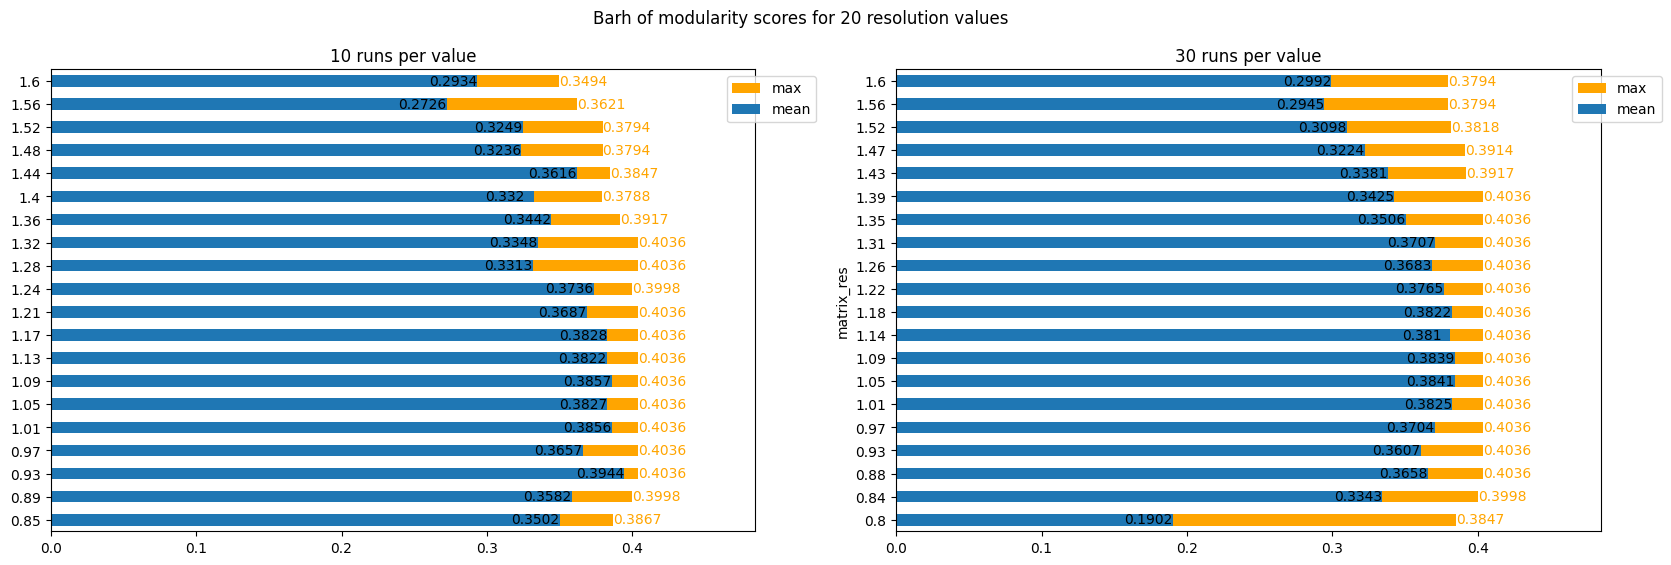

In [17]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle("Barh of modularity scores for 20 resolution values")

prev_a_max_barh = pd.DataFrame(prev_a_max, columns=["max"], index=idx).plot(ax=axes[0], kind="barh", color="orange")
axes[0].bar_label(axes[0].containers[-1], label_type="edge", color="orange")
prev_a_max_barh = pd.DataFrame(prev_a_mean, columns=["mean"], index=idx).plot(ax=axes[0], kind="barh")
axes[0].bar_label(axes[0].containers[-1], label_type="edge", position=(-35,0), color="black")
axes[0].margins(x=0.2)
axes[0].set_title("10 runs per value")
axes[0].legend(
    bbox_to_anchor=(0.95, 1), loc=2
);

a_max_barh = a_by_res.mod_score["max"].plot(ax=axes[1], kind="barh", color="orange")
axes[1].bar_label(axes[1].containers[-1], label_type="edge", color="orange")
a_mean_barh = a_by_res.mod_score["mean"].plot(ax=axes[1], kind="barh")
axes[1].bar_label(axes[1].containers[-1], label_type="edge", position=(-35,0), color="black")
axes[1].margins(x=0.2)
axes[1].set_title("30 runs per value")
axes[1].legend(
    bbox_to_anchor=(0.95, 1), loc=2
);

## What is the maximum of the highest mean mod. score (0.4036) frequency?

In [18]:
# Class (gamma groupby class)
# with highest mean score
highest_score_class = a_by_res.loc[a_by_res["mod_score"]["mean"] == a_by_res["mod_score"]["mean"].max()]
highest_score_idx = highest_score_class.index
highest_score_class

mod_score                        
                mean     std     max     min
matrix_res                                  
1.05          0.3841  0.0202  0.4036  0.3303

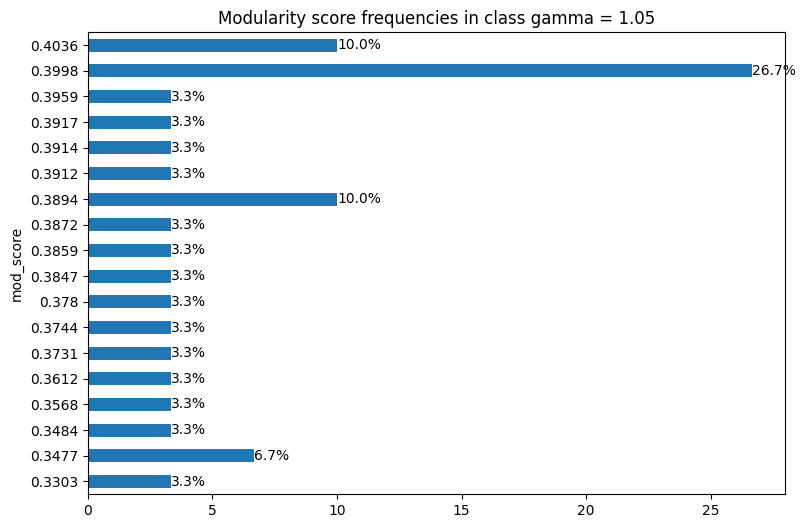

In [21]:
score_counts = a[a.matrix_res.round(2) == highest_score_idx.values[0]].mod_score.round(4).value_counts()
score_frequencies = score_counts / score_counts.sum() * 100

ax = score_frequencies.sort_index().plot(kind="barh", title="Modularity score frequencies "+f"in class gamma = {highest_score_idx.values[0]}")
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%")

- Advantage output the referential, max. modularity scores of 0.4036 in 10% of runs. The second highest score of 0.3998 was output in 26.7% of runs.

## Conclusions after part 2

- The highest max. modularity score results obtained by Advantage were 0.4036, equal to the referential louvain best score result - however in case of Advantage with a significantly lower frequency.
- However, if one's target was to obtain a best possible partitioning (highest mod. score), they maybe wouldn't care whether they need to run the algorithm 10 times to be almost sure to get it, of course provided that they're able to run it 10 times.